# Laboratory Exercise 1
## Data Value Chain, Dataset Acquisition, Organization, and Dataset Card

### Part A: Environment Setup

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

names = "Lorenzo Bela, Robert Callorina, Kean Guzon"
section = "58036"
date = "January 26 2026"

print(f"Name: {names}\nSection: {section}\nDate: {date}")
print(sys.version)

Name: Lorenzo Bela, Robert Callorina, Kean Guzon
Section: 58036
Date: January 26 2026
3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


### Part B: Dataset Acquisition

In [2]:
train_data = torchvision.datasets.CIFAR10(root='../data/raw', train=True, download=True)
test_data = torchvision.datasets.CIFAR10(root='../data/raw', train=False, download=True)

print(len(train_data))
print(len(test_data))
print(train_data.classes)
print(train_data.data.shape)
print(train_data.data.dtype)

for i in range(5):
    img, label = train_data[i]
    print(label, train_data.classes[label], img.size)

50000
10000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)
uint8
6 frog (32, 32)
9 truck (32, 32)
9 truck (32, 32)
4 deer (32, 32)
1 automobile (32, 32)


### Part C: Dataset Exploration Through Visual Sampling

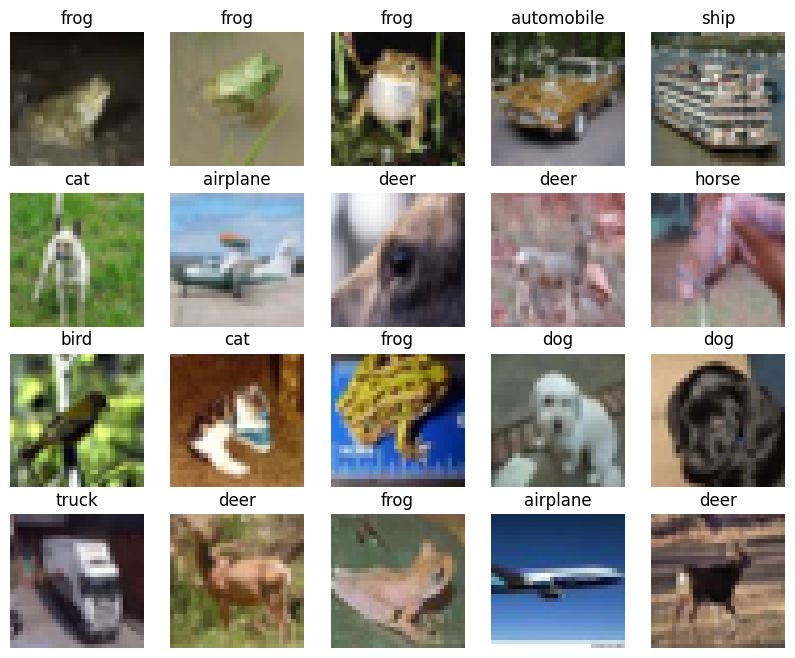

In [3]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
indices = np.random.choice(len(train_data), 20, replace=False)
for i, ax in zip(indices, axes.flat):
    img, label = train_data[i]
    ax.imshow(img)
    ax.set_title(train_data.classes[label])
    ax.axis('off')
plt.savefig('../outputs/figures/lab01_samples.png')
plt.show()

### Part D: Dataset Label Mapping and Class List

In [4]:
mapping = pd.DataFrame({'label_id': range(10), 'class_name': train_data.classes})
mapping.to_csv('../outputs/tables/lab01_label_mapping.csv', index=False)
print(mapping)

   label_id  class_name
0         0    airplane
1         1  automobile
2         2        bird
3         3         cat
4         4        deer
5         5         dog
6         6        frog
7         7       horse
8         8        ship
9         9       truck


### Part E: Class Distribution Analysis

airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64


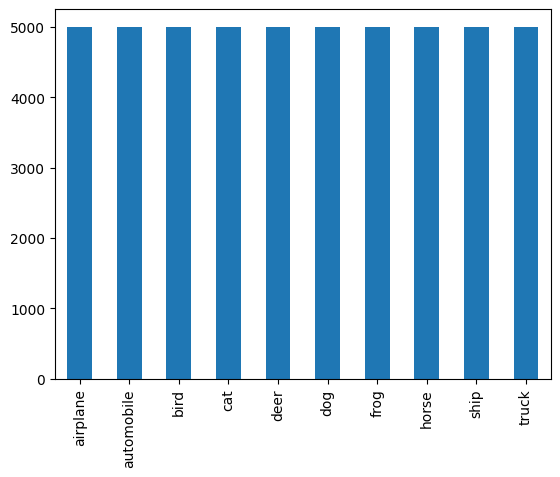

airplane airplane


In [5]:
counts = pd.Series(train_data.targets).value_counts().sort_index()
counts.index = [train_data.classes[i] for i in counts.index]
print(counts)

counts.plot(kind='bar')
plt.savefig('../outputs/figures/lab01_class_distribution.png')
plt.show()

counts.to_csv('../outputs/tables/lab01_class_distribution.csv')
print(counts.idxmax(), counts.idxmin())

### Part F: Dataset Splitting

In [6]:
total_len = len(train_data) + len(test_data)
all_indices = np.arange(total_len)
np.random.seed(42)
np.random.shuffle(all_indices)

train_split = int(0.7 * total_len)
val_split = int(0.15 * total_len)

train_idx = all_indices[:train_split]
val_idx = all_indices[train_split:train_split + val_split]
test_idx = all_indices[train_split + val_split:]

pd.DataFrame(train_idx).to_csv('../outputs/tables/train_indices.csv', index=False, header=False)
pd.DataFrame(val_idx).to_csv('../outputs/tables/val_indices.csv', index=False, header=False)
pd.DataFrame(test_idx).to_csv('../outputs/tables/test_indices.csv', index=False, header=False)

### Questions (Answer Individually)
Answer in the notebook in your own words:
1. List the stages of the ML Data Value Chain and give one output artifact produced in each stage.
2. What is data leakage, and how can it happen during dataset splitting?
3. Why should raw data and processed data be stored in separate folders?
4. If two classes look visually similar (e.g., cat vs dog), how might this affect dataset labeling and model performance?
5. Give two reasons why a Dataset Card is important in real ML projects.

### Bela
1. The ML Data Value Chain proceeds through six stages, which begin with Data Ingestion and finish with Serving after passing through Validation, Preprocessing, Training, and Evaluation. The Data Ingestion phase requires a raw CSV dump as an example artifact, while the Training stage produces a saved model file. The process creates different data outputs for each stage, which helps maintain quality control between stages while enabling reproducible results.
2. Data leakage happens when test set information becomes accessible to the training set, which enables the model to learn from test data. During the data splitting process, this situation happens when time series data gets mixed in a random pattern rather than following its chronological sequence. The practice of splitting samples from the same group, which includes multiple photos of the same person, creates problems when handling time series data.
3. It’s important to keep raw data and processed data in separate because this creates a reference point, which enables you to bring back your original data whenever you need it after failure training process. The first space allows you to keep original data intact, while the second space lets you develop multiple experimental versions of processed data, which different models can use.
4. When classes look similar, like cats versus dogs, it increases the chances of human labeling errors, adding noise to the truth. The model encounters difficulties with because of this similarity, which results in lower confidence scores, with a higher rate of false positives that occur between those specific classes.
5. The Dataset Card provides essential information about the dataset because it presents detailed information about its composition, which helps to identify potential limitations and biases before they starting the training process. The document serves as a record that enables future developers to reproduce results while auditing the specific data version used to build a particular model.

### CALLORINA
1. The ML Data Value Chain first stage is the Data Acquisition, this is where the dataset is obtained in this case is the CIFAR-10 batch files. Second stage is the Data Organization, this is where you separate the raw and processed data in a structured directory folder, in this case data/raw and data/processed. The third stage is the Data Exploration is where the dataset is analyzed producing artifacts such as the sample image figures and class distribution plots. And then Data Preprocessing transforms the raw data for modelling. Next is Data Splitting, this is where the dataset is divided into training, validation and tests and produce in a csv files. Last is the Deployment wherein the users can now use the trained model.
2. Data leakage occurs when information from the validation and test set the same with also used in the model training making the model optimistic than it should be. Data leakage can happen during the dataset splitting by accidentally including test set in the training.
3. Separating raw data and processed data is a best practice in for machine learning. This is to maintain data integrity and reproducibility. This is also to keep the raw data or original data separated from the processed one so that the original source and still be reprocessed under different parameters.
4. Visually similar classes can create challenges in labelling. Annotators can make labeling errors. This results to the model struggling to learn the discriminative features between the similar classes.
5. First reason is Dataset Card provide transparency and documentation about data sources, how it was collected and how will it be use. Second is it identify biases, limitations, ethical and privacy considerations

### GUZON
1. The ML Data Value Chain starts by defining requirements and collecting raw data, which will be organized, labeled, and cleaned to prepare it for analysis. The processed data will be explored and divided into subsets for training, producing trained models, and performance records. It will then end with thorough evaluation, deployment of the final model, and continuous monitoring to maintain quality and detect potential drift over time.
2. Data leakage happens when information from validation or test data will influence the training process that will lead to high performance. It happens when preprocessing is done before splitting the data or when duplicate or related samples appear in both training and test sets.
3. Raw data should remain unchanged, so results can always be reproduced or audited. Separating it from processed data prevents accidental modification and allows multiple preprocessing experiments without risking the original dataset.
4. Visually similar classes increase labeling ambiguity, which can lead to inconsistent or incorrect annotations. This confusion often reduces model accuracy and causes frequent misclassifications between those classes.
5. A Dataset Card provides transparency by documenting the dataset’s origin, structure, and limitations. It also supports reproducibility and responsible use by clearly stating preprocessing steps, biases, and intended use cases.